In [2]:
%matplotlib inline
import pandas as np
import xarray as xr
import numpy as np
import os
import sys
sys.path.insert(0, '/home/catherinej/claw_code/src/claw_code/post')
sys.path.insert(0, '/home/catherinej/BarrierBreach/src')
import waveforms
import pygmt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
# 

In [3]:
west = pd.read_pickle('/home/catherinej/BarrierBreach/data/plotdata/west_fgmax_points.pkl.gz')
central = pd.read_pickle('/home/catherinej/BarrierBreach/data/plotdata/central_fgmax_pts.pkl.gz')
east = pd.read_pickle('/home/catherinej/BarrierBreach/data/plotdata/east_fgmax_pts.pkl.gz')

In [4]:
def hist_nine(x, y, z, k, bins, ax):
    from matplotlib.ticker import FormatStrFormatter
    from matplotlib.ticker import LinearLocator
    ax.hist(x['data'], bins, weights=x['weight'], color=x['color'], histtype='stepfilled', alpha=0.2, label=x['name'])
    ax.hist(x['data'], bins, weights=x['weight'], color=x['color'], histtype='step', alpha=0.7)
    
    ax.hist(y['data'], bins, weights=y['weight'], color=y['color'], histtype='stepfilled', alpha=0.2, label=y['name'])
    ax.hist(y['data'], bins, weights=y['weight'], color=y['color'], histtype='step', alpha=0.7)
    
    ax.hist(z['data'], bins, weights=z['weight'], color=z['color'], histtype='stepfilled', alpha=0.2, label=z['name'])
    ax.hist(z['data'], bins, weights=z['weight'], color=z['color'], histtype='step', alpha=0.7)
    
    ax.hist(k['data'], bins, weights=k['weight'], color=k['color'], histtype='stepfilled', alpha=0.2, label=k['name'])
    ax.hist(k['data'], bins, weights=k['weight'], color=k['color'], histtype='step', alpha=0.7)
    # ax.set_aspect('equal')
    ax.xaxis.set_major_locator(LinearLocator(8))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    

<Figure size 3000x900 with 0 Axes>

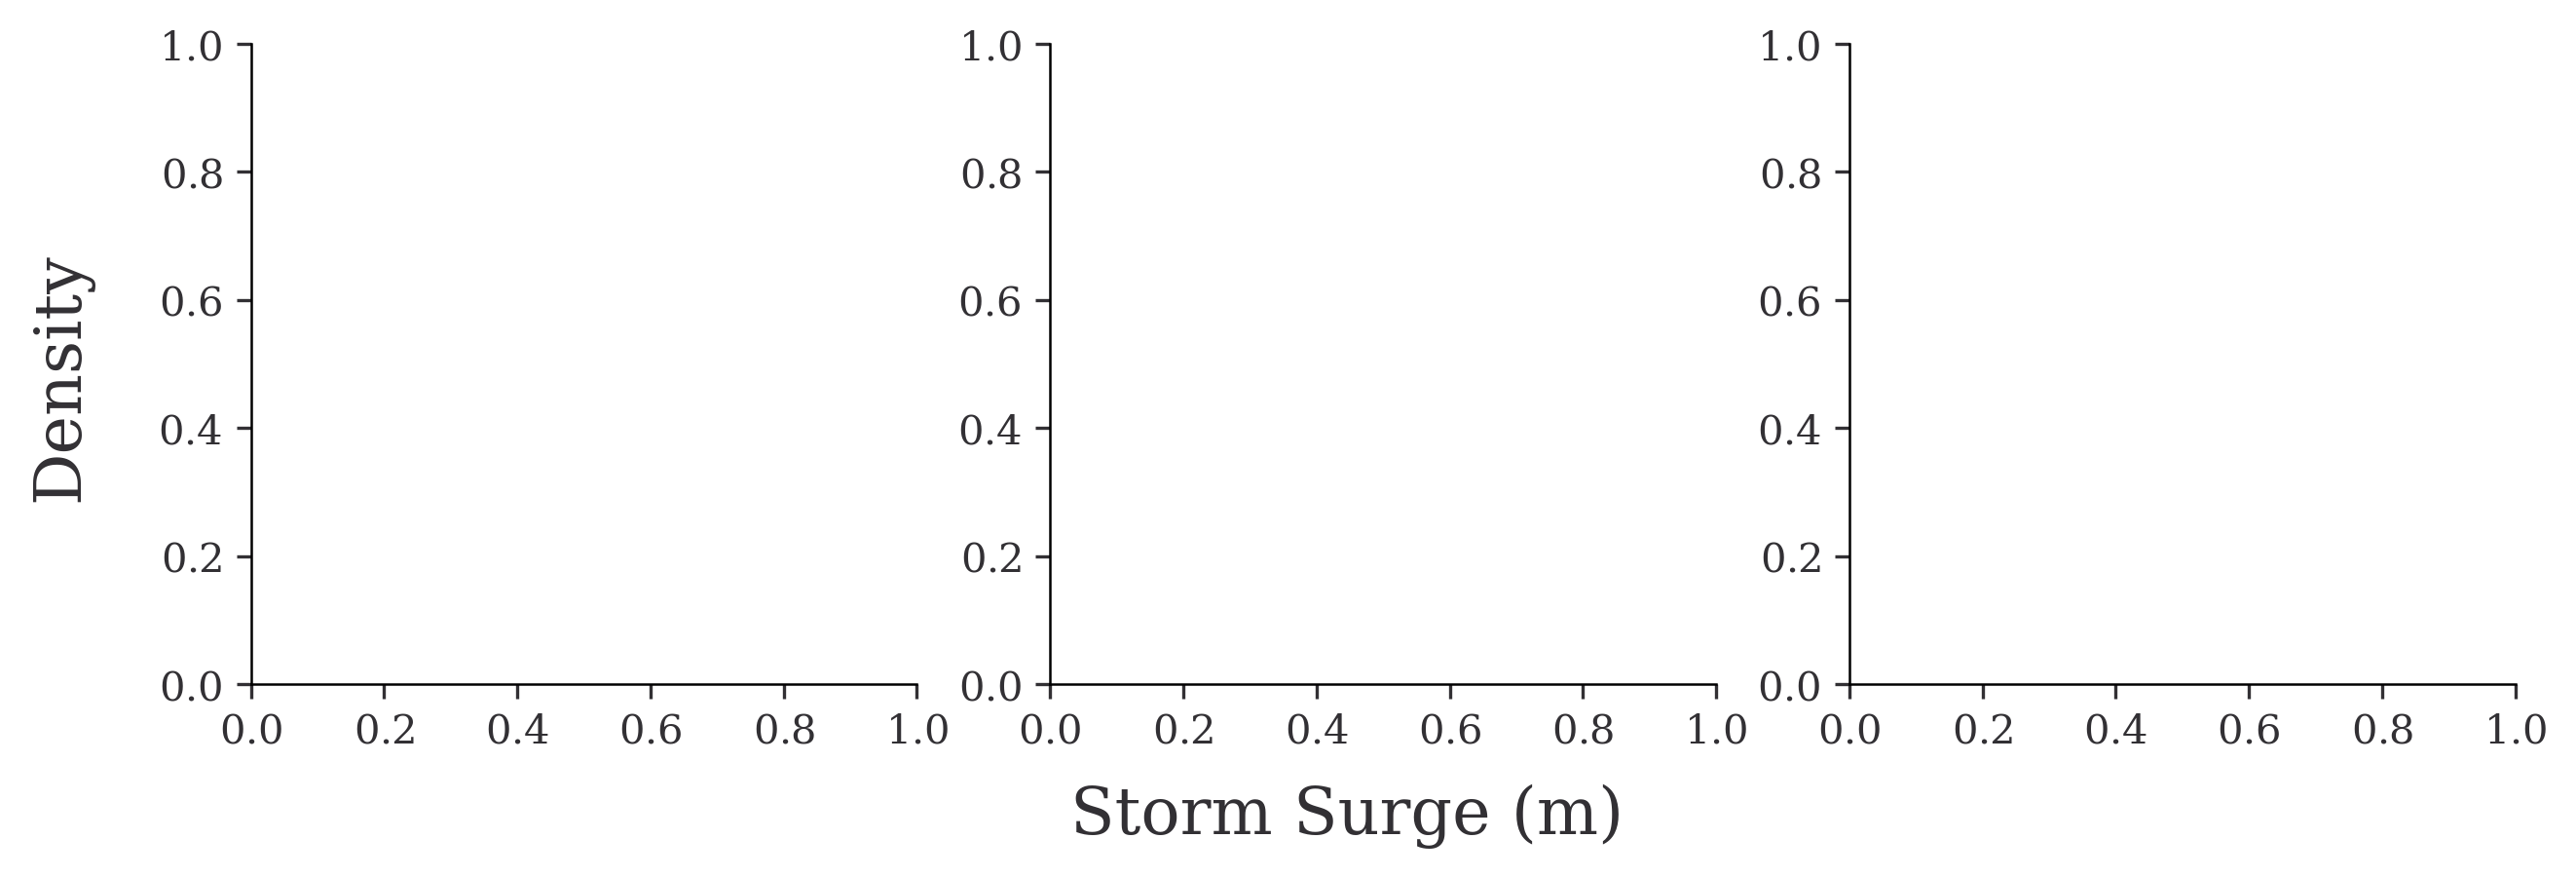

In [5]:
# Plot width vs depth histograms on same figure
subsets = [central[central.columns[1]], west[west.columns[1]], east[east.columns[1]]]
names = ['west', 'central', 'east']

plt.figure(figsize=(10,3))
plt.subplots_adjust(hspace=0.25, wspace=0.25)
# plt.suptitle(f'Location')

hist_stats = {}
fig, axes = plt.subplots(1,3,figsize=(10,3))

for idx, subset in enumerate(subsets):
    
    # for i in range(3):
        # fig, ax = plt.subplots(1,figsize=(3,1.5))
        # plt.suptitle(f'location {i+1}')
    
        # ax = axes[i, idx]
    ax = axes[idx]
    # ax.set_title(names[idx].capitalize())
    x = {}
    y = {}
    z = {}
    k = {}
#     wd = subset[subset.index.str.contains('dw')]

#     depth = subset[~subset.index.str.contains('w')]
#     width = subset[~subset.index.str.contains('d')]
#     wweights = np.ones_like(width)/len(width)
#     dweights = np.ones_like(depth)/len(depth)
#     wd_weights = np.ones_like(wd)/len(wd)
#     bins=np.histogram(np.hstack((wd,width, depth)), bins=20)[1]
#     x = {'data': wd,
#          'weight': wd_weights,
#          'color': 	'#D55E00',
#         'name': 'vary both'}
#     y = {'data': width,
#          'weight': wweights,
#          'color': '#009E73',
#          'name': 'vary width'}
#     z = {'data': depth,
#          'weight': dweights,
#          'color': '#56B4E9',
#          'name': 'vary depth'}

#     hist_nine(x,y,z, bins, ax)
#     plt.setp(ax,  ylim=(0.0, 0.4), xlim=(0.55, 1.30)
#     )
    wd = subset[subset.index.str.contains('dw')]
    rall = subset[subset.index.str.contains('loc')]
    depth = subset[~subset.index.str.contains('|'.join(['w', 'loc']))]
    width = subset[~subset.index.str.contains('|'.join(['d', 'loc']))]
    hist_stats[idx] = {'width and depth': wd,
                       'location' : rall,
                       'width' : width,
                       'depth' : depth}
#     wweights = np.ones_like(width)/len(width)
#     dweights = np.ones_like(depth)/len(depth)
#     rweights = np.ones_like(rall)/len(rall)
#     wd_weights = np.ones_like(wd)/len(wd)
#     bins=np.histogram(np.hstack((wd,width, depth, rall)), bins=20)[1]
#     x = {'data': wd,
#          'weight': wd_weights,
#          'color': 	'#D55E00',
#          'name': 'vary both'}
#     y = {'data': width,
#          'weight': wweights,
#          'color': '#009E73',
#          'name': 'vary width'}
#     z = {'data': depth,
#          'weight': dweights,
#          'color': '#56B4E9',
#          'name': 'vary depth'}
#     k = {'data': rall,
#          'weight': rweights,
#          'color': '#CC79A7',
#          'name': 'vary all'}

#     hist_nine(x,y,z,k, bins, ax)
#     plt.setp(ax,  ylim=(0.0, 0.4), xlim=(0.55, 2.0)
#     )
#     print(f'{names[idx]}')
#     print(f'Mean rall {rall.mean()} \n var rall {rall.var()} ')
#     print(f'Mean width {width.mean()} \n width rall {width.var()} ')
#     print(f'Mean depth {depth.mean()} \n depth rall {depth.var()} ')
#     print(f'Mean wd {wd.mean()} \n wd rall {wd.var()} ')
    

# plt.legend(loc=(.80,.95))


# fig.tight_layout()
# plt.title = names[idx]
# plt.title(f'{title} bay random location')
# Set common labels
fig.text(0.5, 0.0001, 'Storm Surge (m)', ha='center', va='center', fontsize=16)
fig.text(0.06, 0.5, 'Density', ha='center', va='center', rotation='vertical', fontsize=16)
fig.subplots_adjust(bottom=0.15)
# axes.set_xlabel('Storm Surge (m)')
# axes.set_ylabel('Density')
plt.show()

# plt.savefig(f'/home/catherinej/BarrierBreach/visualization/{names[idx]}_{i}.png',  bbox_inches='tight')


# adjust the legend position
# adjust title
# figure out scale issues



In [6]:
mpl.use('pgf')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
# plt.rcParams.update({
#     "font.family": "serif",  # use serif/main font for text elements
#     "text.usetex": True,     # use inline math for ticks
#     "pgf.rcfonts": False,    # don't setup fonts from rc parameters
#     "pgf.preamble": "\n".join([
#          r"\usepackage{url}",            # load additional packages
#          r"\usepackage{unicode-math}",   # unicode math setup
#          r"\setmainfont{DejaVu Serif}",  # serif font via preamble
#     ])
# })


In [7]:
# Plot width vs depth histograms on same figure
subsets = [central[central.columns[1]], west[west.columns[1]], east[east.columns[1]]]
names = ['west', 'central', 'east']

plt.figure(figsize=(8,2.33))
plt.subplots_adjust(hspace=0.25, wspace=0.25)
# plt.suptitle(f'Location')


fig, axes = plt.subplots(1,3,figsize=(10,3))

for idx, subset in enumerate(subsets):
    
    # for i in range(3):
        # fig, ax = plt.subplots(1,figsize=(3,1.5))
        # plt.suptitle(f'location {i+1}')
    
        # ax = axes[i, idx]
    ax = axes[idx]
    ax.set_title(names[idx].capitalize())
    x = {}
    y = {}
    z = {}
    k = {}
    wd = subset[subset.index.str.contains('dw')]
    rall = subset[subset.index.str.contains('loc')]
    print(rall.max())
    depth = subset[~subset.index.str.contains('|'.join(['w', 'loc']))]
    width = subset[~subset.index.str.contains('|'.join(['d', 'loc']))]
    wweights = np.ones_like(width)/len(width)
    dweights = np.ones_like(depth)/len(depth)
    rweights = np.ones_like(rall)/len(rall)
    wd_weights = np.ones_like(wd)/len(wd)
    bins=np.histogram(np.hstack((wd,width, depth, rall)), bins=20)[1]
    x = {'data': wd,
         'weight': wd_weights,
         'color': 	'#D55E00',
         'name': 'Width and Depth'}
    y = {'data': width,
         'weight': wweights,
         'color': '#009E73',
         'name': 'Width'}
    z = {'data': depth,
         'weight': dweights,
         'color': '#56B4E9',
         'name': 'Depth'}
    k = {'data': rall,
         'weight': rweights,
         'color': '#CC79A7',
         'name': 'Locations'}

    hist_nine(x,y,z,k, bins, ax)
    plt.setp(ax,  ylim=(0.0, 0.80), xlim=(0.55, 2.0)
    )


plt.legend(loc=(.75,.75))


# fig.tight_layout()
plt.title = names[idx]
# plt.title(f'{title} bay random location')
fig.text(0.5, 0.0001, 'Storm Surge (m)', ha='center', va='center', fontsize=16)
fig.text(0.06, 0.5, 'Density', ha='center', va='center', rotation='vertical', fontsize=16)
fig.subplots_adjust(bottom=0.15)
plt.show()
plt.savefig(f'/home/catherinej/BreachPaper/BarrierBreachPaper/figures/fig3_v2.pgf', format='pgf', bbox_inches='tight')


# adjust the legend position
# adjust title
# figure out scale issues



1.9561007
1.80458052
1.5762432



kpathsea: Running mktextfm Helvetica
/usr/share/texlive/texmf-dist/web2c/mktexnam: Could not map source abbreviation H for Helvetica.
/usr/share/texlive/texmf-dist/web2c/mktexnam: Need to update /usr/share/texlive/texmf-dist/fonts/map/fontname/special.map?
mktextfm: Running mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input Helvetica
This is METAFONT, Version 2.7182818 (TeX Live 2019/Debian) (preloaded base=mf)

kpathsea: Running mktexmf Helvetica

! I can't find file `Helvetica'.
<*> ...jfour; mag:=1; nonstopmode; input Helvetica
                                                  
Please type another input file name
! Emergency stop.
<*> ...jfour; mag:=1; nonstopmode; input Helvetica
                                                  
Transcript written on mfput.log.
grep: Helvetica.log: No such file or directory
mktextfm: `mf-nowin -progname=mf \mode:=ljfour; mag:=1; nonstopmode; input Helvetica' failed to make Helvetica.tfm.
kpathsea: Appending font creation commands to 

ValueError: Error measuring '\\setmainfont{Helvetica}\\rmfamily\\fontsize{16.000000}{19.200000}\\selectfont lp'
LaTeX Output:

! Package fontspec Error: The font "Helvetica" cannot be found.

For immediate help type H <return>.
 ...                                              
                                                  
<*> ...ntsize{16.000000}{19.200000}\selectfont lp}
                                                  \typeout{\the\wd0,\the\ht0...
No pages of output.
Transcript written on texput.log.


In [12]:
import matplotlib.pyplot as plt
plt.style.use('./mystyle.mplstyle')

# mpl.use('pgf')
# Plot width vs depth histograms on same figure
subsets = [central[central.columns[1]], west[west.columns[1]], east[east.columns[1]]]
names = ['west', 'central', 'east']

plt.figure(figsize=(8,2.33))
plt.subplots_adjust(hspace=0.25, wspace=0.25)
# plt.suptitle(f'Location')


fig, axes = plt.subplots(1,3,figsize=(10,3))

for idx, subset in enumerate(subsets):
    
    # for i in range(3):
        # fig, ax = plt.subplots(1,figsize=(3,1.5))
        # plt.suptitle(f'location {i+1}')
    
        # ax = axes[i, idx]
    ax = axes[idx]
    ax.set_title(names[idx].capitalize())
    x = {}
    y = {}
    z = {}
    k = {}
    wd = subset[subset.index.str.contains('dw')]
    rall = subset[subset.index.str.contains('loc')]
    print(rall.max())
    depth = subset[~subset.index.str.contains('|'.join(['w', 'loc']))]
    width = subset[~subset.index.str.contains('|'.join(['d', 'loc']))]
    wweights = np.ones_like(width)/len(width)
    dweights = np.ones_like(depth)/len(depth)
    rweights = np.ones_like(rall)/len(rall)
    wd_weights = np.ones_like(wd)/len(wd)
    bins=np.histogram(np.hstack((wd,width, depth, rall)), bins=20)[1]
    x = {'data': wd,
         'weight': wd_weights,
         'color': 	'#D55E00',
         'name': 'vary both'}
    y = {'data': width,
         'weight': wweights,
         'color': '#009E73',
         'name': 'vary width'}
    z = {'data': depth,
         'weight': dweights,
         'color': '#56B4E9',
         'name': 'vary depth'}
    k = {'data': rall,
         'weight': rweights,
         'color': '#CC79A7',
         'name': 'vary all'}

    hist_nine(x,y,z,k, bins, ax)
    plt.setp(ax,  ylim=(0.0, 0.80), xlim=(0.55, 2.0)
    )
    
plt.legend(loc=(.75,.75))


# fig.tight_layout()
plt.title = names[idx]
# plt.title(f'{title} bay random location')
fig.text(0.5, 0.0001, 'Storm Surge (m)', ha='center', va='center', fontsize=12)
fig.text(0.06, 0.5, 'Density', ha='center', va='center', rotation='vertical', fontsize=12)
fig.subplots_adjust(bottom=0.15)
plt.show()
plt.savefig(f'/home/catherinej/BreachPaper/BarrierBreachPaper/fig3.pgf', format='pgf', bbox_inches='tight')


# adjust the legend position
# adjust title
# figure out scale issues



1.9561007
1.80458052
1.5762432


In [ ]:
# Get mean/max/min/median for central fgmax points for each category
data = central[central.columns[1]]
w = [col for col in data if 'w' in col and not 'd' in col]
w

In [ ]:
data.info()

In [ ]:
hist_stats[0]['width and depth'].mean()

In [8]:
# Create empty lists to store statistics
regions = []
series_names = []
min_values = []
max_values = []
mean_values = []
median_values = []
variance_values = []
density_peak_values = []
std_dev_values = []

# Function to map keys to regions
def map_to_region(key):
    regions = {0: "West", 1: "Central", 2: "East"}
    return regions[key]


# Loop through the dictionary and calculate statistics for each series
for key, series_data in hist_stats.items():
    region = map_to_region(key)
    for series_name, series in series_data.items():
        regions.append(region)
        series_names.append(series_name.capitalize())
        min_values.append(series.min())
        max_values.append(series.max())
        mean_values.append(series.mean())
        median_values.append(series.median())
        variance_values.append(series.var())
        std_dev_values.append(series.std())
        print(series_name, series.mode().iloc[0])
        density_peak_values.append(series.mode().iloc[0])

# Create a DataFrame to store the statistics
data = {
    "Region": regions,
    "Series Name": series_names,
    "Min": min_values,
    "Max": max_values,
    "Mean": mean_values,
    "Median": median_values,
    "Variance": variance_values,
    "Density Peak": density_peak_values,
    "Standard Deviation": std_dev_values
}

statistics_df = pd.DataFrame(data)

# Round the values for better presentation
statistics_df = statistics_df.round(2)

# Convert the DataFrame to LaTeX table format
latex_table = statistics_df.to_latex(index=False)

# Print the LaTeX table
print(latex_table)


width and depth 0.747539
location 0.7455757000000001
width 0.8349665
depth 0.9587781999999998
width and depth 0.91600622
location 0.9157247199999999
width 0.9500128200000001
depth 1.01461522
width and depth 0.637561
location 0.635667
width 0.6909293999999999
depth 0.7878737999999998
\begin{tabular}{llrrrrrrr}
\toprule
 Region &     Series Name &  Min &  Max &  Mean &  Median &  Variance &  Density Peak &  Standard Deviation \\
\midrule
   West & Width and depth & 0.75 & 1.07 &  0.88 &    0.89 &      0.01 &          0.75 &                0.08 \\
   West &        Location & 0.75 & 1.96 &  1.60 &    1.69 &      0.10 &          0.75 &                0.32 \\
   West &           Width & 0.83 & 1.13 &  0.97 &    0.96 &      0.00 &          0.83 &                0.07 \\
   West &           Depth & 0.96 & 1.12 &  1.06 &    1.07 &      0.00 &          0.96 &                0.04 \\
Central & Width and depth & 0.92 & 1.10 &  0.98 &    0.98 &      0.00 &          0.92 &                0.05 \\
Centr

/tmp/ipykernel_3184667/152286107.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = statistics_df.to_latex(index=False)


In [9]:
statistics_df

,Region,Series Name,Min,Max,Mean,Median,Variance,Density Peak,Standard Deviation
0,West,Width and depth,0.75,1.07,0.88,0.89,0.01,0.75,0.08
1,West,Location,0.75,1.96,1.60,1.69,0.10,0.75,0.32
2,West,Width,0.83,1.13,0.97,0.96,0.00,0.83,0.07
3,West,Depth,0.96,1.12,1.06,1.07,0.00,0.96,0.04
4,Central,Width and depth,0.92,1.10,0.98,0.98,0.00,0.92,0.05
5,Central,Location,0.92,1.80,1.60,1.70,0.06,0.92,0.24
6,Central,Width,0.95,1.25,1.09,1.08,0.00,0.95,0.07
7,Central,Depth,1.01,1.12,1.07,1.07,0.00,1.01,0.02
8,East,Width and depth,0.64,0.84,0.72,0.73,0.00,0.64,0.05
9,East,Location,0.64,1.58,1.30,1.38,0.07,0.64,0.26


In [10]:
# Convert the DataFrame to LaTeX table format
latex_table = statistics_df.to_latex(index=True)

# Save the LaTeX table to a file
with open('/home/catherinej/BreachPaper/BarrierBreachPaper/figures/fgmax_statistics_table.tex', 'w') as f:
    f.write(latex_table)


/tmp/ipykernel_3184667/4154680727.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = statistics_df.to_latex(index=True)


In [11]:
s = pd.Series([1, 2, 2, 3, 3, 3, 4, 4, 4, 4])
s.mode()

0    4
dtype: int64

In [59]:
s.mode().iloc[0]

4

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

# Function to map keys to regions
def map_to_region(key):
    regions = {0: "west", 1: "central", 2: "east"}
    return regions[key]

# Create empty lists to store statistics and density peaks
regions = []
series_names = []
min_values = []
max_values = []
mean_values = []
median_values = []
variance_values = []
density_peak_values = []
std_dev_values = []

# Loop through the dictionary and calculate statistics for each series
for key, series_data in hist_stats.items():
    region = map_to_region(key)
    for series_name, series in series_data.items():
        regions.append(region)
        series_names.append(series_name.capitalize())
        min_values.append(series.min())
        max_values.append(series.max())
        mean_values.append(series.mean())
        median_values.append(series.median())
        variance_values.append(series.var())
        std_dev_values.append(series.std())

        # Calculate KDE for density estimation
        kde = sns.kdeplot(series)
        density_peak_value = kde.get_lines()[0].get_data()[1].max()
        density_peak_x = kde.get_lines()[0].get_data()[0][kde.get_lines()[0].get_data()[1].argmax()]
        density_peak_values.append(density_peak_x)
        plt.clf()

# Create a DataFrame to store the statistics and density peaks
data = {
    "Region": regions,
    "Series Name": series_names,
    "Min": min_values,
    "Max": max_values,
    "Mean": mean_values,
    "Median": median_values,
    'Standard Deviation': std_dev_values,
    "Variance": variance_values,
    "Density Peak": density_peak_values,
}

statistics_df = pd.DataFrame(data)

# Round the values for better presentation
statistics_df = statistics_df.round(2)

# Convert the DataFrame to LaTeX table format
latex_table = statistics_df.to_latex(index=False)

# Save the LaTeX table to a file
with open('statistics_table.tex', 'w') as f:
    f.write(latex_table)

# Print a message to indicate the successful save
print("LaTeX table saved as 'statistics_table.tex'")


LaTeX table saved as 'statistics_table.tex'


/tmp/ipykernel_1371878/427765616.py:60: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = statistics_df.to_latex(index=False)


<Figure size 1920x1440 with 0 Axes>

In [70]:
# Convert the DataFrame to LaTeX table format
latex_table = statistics_df.to_latex(index=True)

# Save the LaTeX table to a file
with open('/home/catherinej/BreachPaper/BarrierBreachPaper/figures/fgmax_statistics_table.tex', 'w') as f:
    f.write(latex_table)


/tmp/ipykernel_1371878/4154680727.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = statistics_df.to_latex(index=True)
